In [1]:
import os
import cPickle
import os.path as op
import numpy as np
from multiprocessing import pool
from finsymbols import symbols
from progressbar import ProgressBar

### Shrink numpy data

In [ ]:
CUR_DIR = os.getcwd()
DATA_DIR = op.join(CUR_DIR, 'data')
DUMP_DIR = op.join(CUR_DIR, 'data_32')

sp500 = symbols.get_sp500_symbols()
sp_name = [sym['symbol'] for sym in sp500]

with open(op.join(DATA_DIR,'x_AGN.pkl'), 'r') as apl:
    appl_x = cPickle.load(apl)
with open(op.join(DATA_DIR,'y_AGN.pkl'), 'r') as apl:
    appl_y = cPickle.load(apl)

In [ ]:
def concat_data():
    bar = ProgressBar()
    x_pile = []
    y_pile = []
    for cmpny in bar(sp_name):
        fx = op.join(DATA_DIR, "x_%s.pkl"%cmpny)
        if op.exists(fx):
            fy = op.join(DATA_DIR, "y_%s.pkl"%cmpny)
            with open(fx, 'r') as npx:
                x_pile.append(cPickle.load(npx))
            with open(fy, 'r') as npy:
                y_pile.append(cPickle.load(npy))
    trX = np.concatenate(x_pile)
    trY = np.concatenate(y_pile)
    permu = np.random.permutation(trX.shape[0])
    np.take(trX,permu,axis=0,out=trX)
    np.take(trY,permu,axis=0,out=trY)
    div = int(trX.shape[0]*0.8)
    with open(op.join(DATA_DIR, "trX.pkl"), 'w') as tx:
        cPickle.dump(trX[0:div], tx)
    with open(op.join(DATA_DIR, "teX.pkl"), 'w') as tx:
        cPickle.dump(trX[div:], tx)
    with open(op.join(DATA_DIR, "trY.pkl"), 'w') as ty:
        cPickle.dump(trY[0:div], ty)
    with open(op.join(DATA_DIR, "teY.pkl"), 'w') as ty:
        cPickle.dump(trY[div:], ty)
concat_data()

100% (505 of 505) |#######################| Elapsed Time: 0:15:13 Time: 0:15:13


### Visualizing data

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline


In [15]:
print(np.shape(appl_x))

(49, 4, 224, 224)


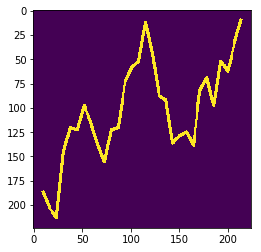

In [6]:
plt.imshow(appl_x[0,3])